# Data Analyst Nanodegree Project : Investigate TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## 1. Introduction ##

This report is a part of Udacity's Data Analyst Nanodegree Program. This report is s submission towards the Project: Investigate a dataset. The chosen dataset for this submission is The TMDb Movies Dataset. The reason to choose this topic is that almost everyone loves movies. Being a data analyst, the curiosity to know more about the factors influencing a movie budget or revenue is what makes this dataset very interesting to explore.
The questions answered in this report are:
 1. Which genres are most popular from year to year?
 2. What kinds of properties are associated with movies that have high revenues

In [197]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

## 2. Data Wrangling ##


### General Properties ###

In [198]:
# Loading the dataset, understanding the data and looking for trends and patterns
df = pd.read_csv('tmdb-movies.csv')

In [199]:
# Displays few rows and columns of the dataset
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00


## 3. Exploratory Data Analysis

In [200]:
# Gives information about all the columns, their data types and count of NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Few cells have missing values which needs to be addressed. This dataset has 10866 observations with 21 features.

In [201]:
# Gives the statistics for all the numeric features/columns in the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,"10,866.00","66,064.18","92,130.14",5.00,"10,596.25","20,669.00","75,610.00","417,859.00"
popularity,"10,866.00",0.65,1.00,0.00,0.21,0.38,0.71,32.99
budget,"10,866.00","14,625,701.09","30,913,213.83",0.00,0.00,0.00,"15,000,000.00","425,000,000.00"
revenue,"10,866.00","39,823,319.79","117,003,486.58",0.00,0.00,0.00,"24,000,000.00","2,781,505,847.00"
runtime,"10,866.00",102.07,31.38,0.00,90.00,99.00,111.00,900.00
vote_count,"10,866.00",217.39,575.62,10.00,17.00,38.00,145.75,"9,767.00"
vote_average,"10,866.00",5.97,0.94,1.50,5.40,6.00,6.60,9.20
release_year,"10,866.00","2,001.32",12.81,"1,960.00","1,995.00","2,006.00","2,011.00","2,015.00"
budget_adj,"10,866.00","17,551,039.82","34,306,155.72",0.00,0.00,0.00,"20,853,251.08","425,000,000.00"
revenue_adj,"10,866.00","51,364,363.25","144,632,485.04",0.00,0.00,0.00,"33,697,095.72","2,827,123,750.41"


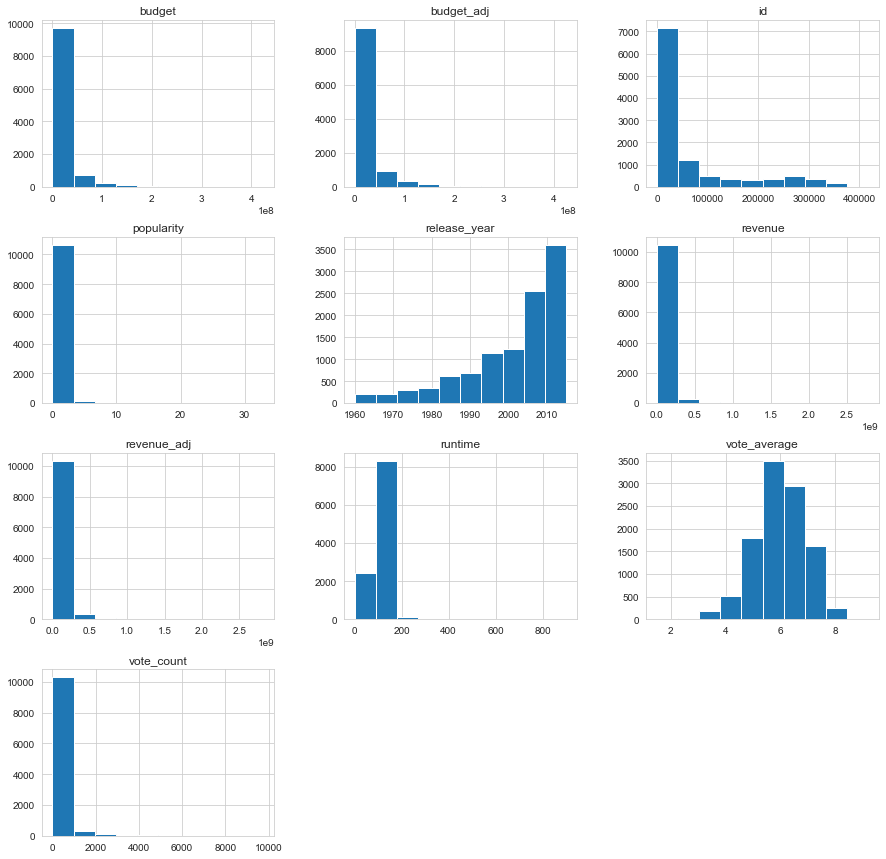

In [202]:
# Understanding the trends in all the numeric columns/features
df.hist(figsize=(15,15));

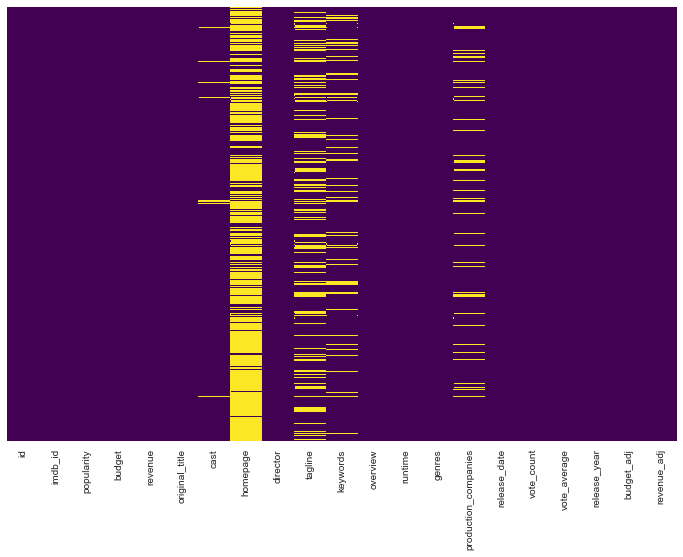

In [203]:
# Checking for null values in the dataset. Yellow Lines indicate missing/null values.
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It can be seen that homepage column/feature has lots of null values. This column can be dropped completely. Other null values need to be addressed.

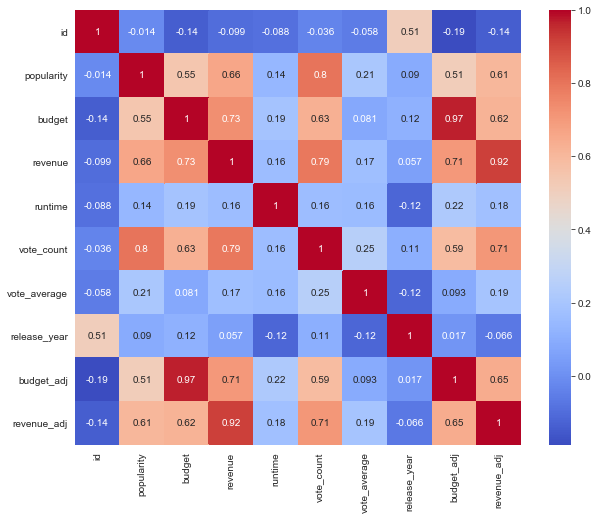

In [204]:
# Understanding the correlation between the numeric values in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm', annot = True) 

Text(0, 0.5, 'Number of Movies')

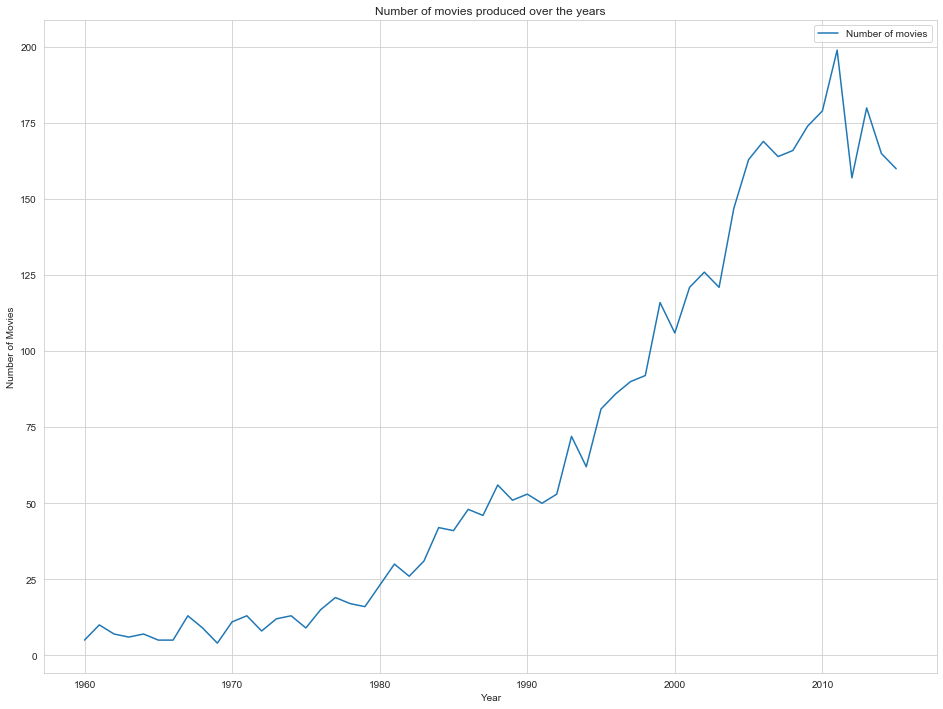

In [205]:
number_of_movies = [] #creates a list of tuples for number of movies

#for loop to create number_of_movies, years was previously defined
for year in years:
    d = df_genres_dates[df_genres_dates['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    number_of_movies.append((year, e)) #appends year with respective number of rows
    
#creates df for list of tuples number_of_movies
df_number_of_movies = pd.DataFrame(number_of_movies, columns=['release_year', 'number_of_movies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

df_number_of_movies.plot(x='release_year', y='number_of_movies', kind='line', figsize=(16,12), title="Number of movies produced over the years", label="Number of movies", )
plt.xlabel('Year')
plt.ylabel('Number of Movies')

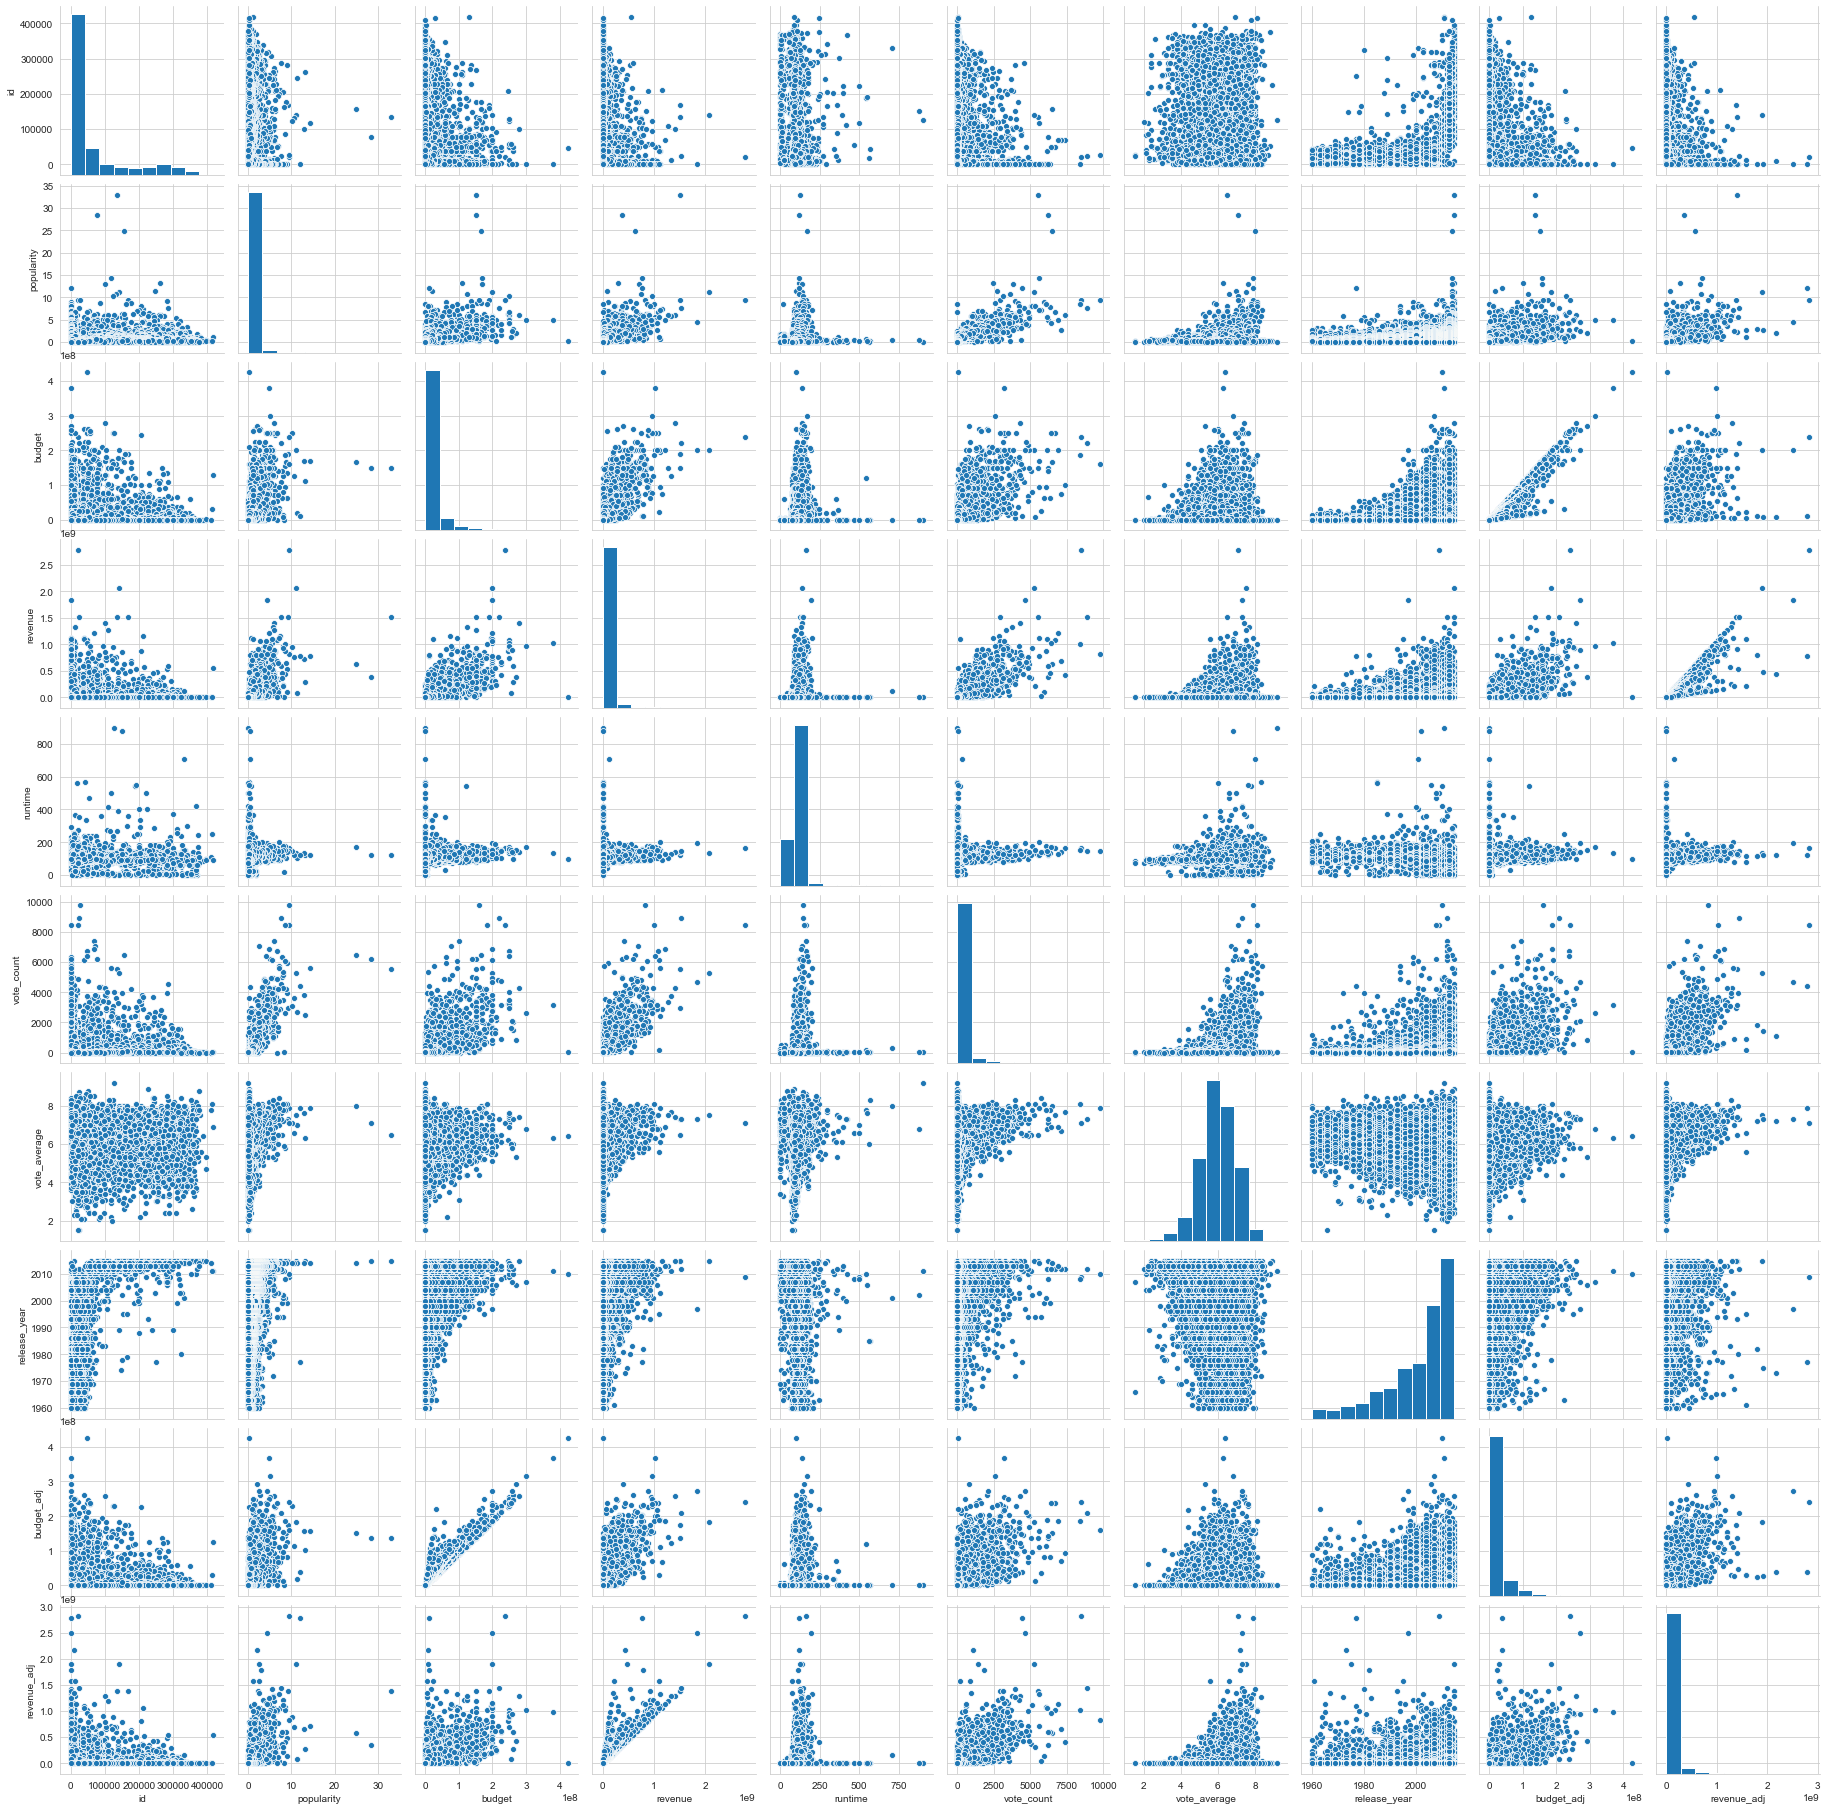

In [206]:
sns.pairplot(df)

It can be seen that many features have high correlation with the other numeric features.

### Data Cleaning ###

In [207]:
df = df.drop(['homepage','keywords','tagline','production_companies', 'imdb_id'], axis=1)
# Dropping all the unnecessary columns which contains many null values which are difficult to replace

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   overview        10862 non-null  object 
 8   runtime         10866 non-null  int64  
 9   genres          10843 non-null  object 
 10  release_date    10866 non-null  object 
 11  vote_count      10866 non-null  int64  
 12  vote_average    10866 non-null  float64
 13  release_year    10866 non-null  int64  
 14  budget_adj      10866 non-null  float64
 15  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


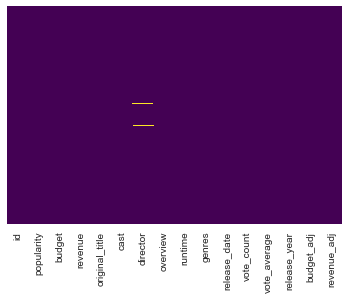

In [209]:
# Checking for missing values again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [210]:
# Drops all the null values
df.dropna(axis=0, inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10730 non-null  int64  
 1   popularity      10730 non-null  float64
 2   budget          10730 non-null  int64  
 3   revenue         10730 non-null  int64  
 4   original_title  10730 non-null  object 
 5   cast            10730 non-null  object 
 6   director        10730 non-null  object 
 7   overview        10730 non-null  object 
 8   runtime         10730 non-null  int64  
 9   genres          10730 non-null  object 
 10  release_date    10730 non-null  object 
 11  vote_count      10730 non-null  int64  
 12  vote_average    10730 non-null  float64
 13  release_year    10730 non-null  int64  
 14  budget_adj      10730 non-null  float64
 15  revenue_adj     10730 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [212]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
# Replacing all the 0 values with NaN so that they are considered as Null values and can be handled accordingly

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10730 non-null  int64  
 1   popularity      10730 non-null  float64
 2   budget          5154 non-null   float64
 3   revenue         4844 non-null   float64
 4   original_title  10730 non-null  object 
 5   cast            10730 non-null  object 
 6   director        10730 non-null  object 
 7   overview        10730 non-null  object 
 8   runtime         10703 non-null  float64
 9   genres          10730 non-null  object 
 10  release_date    10730 non-null  object 
 11  vote_count      10730 non-null  int64  
 12  vote_average    10730 non-null  float64
 13  release_year    10730 non-null  int64  
 14  budget_adj      5154 non-null   float64
 15  revenue_adj     4844 non-null   float64
dtypes: float64(7), int64(3), object(6)
memory usage: 1.4+ MB


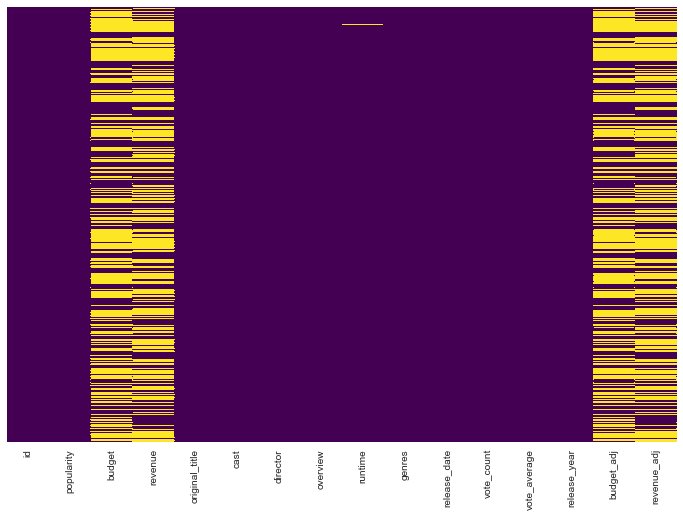

In [214]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [215]:
# Drop all the observations with missing values
df.dropna(axis=0, inplace=True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3850 non-null   int64  
 1   popularity      3850 non-null   float64
 2   budget          3850 non-null   float64
 3   revenue         3850 non-null   float64
 4   original_title  3850 non-null   object 
 5   cast            3850 non-null   object 
 6   director        3850 non-null   object 
 7   overview        3850 non-null   object 
 8   runtime         3850 non-null   float64
 9   genres          3850 non-null   object 
 10  release_date    3850 non-null   object 
 11  vote_count      3850 non-null   int64  
 12  vote_average    3850 non-null   float64
 13  release_year    3850 non-null   int64  
 14  budget_adj      3850 non-null   float64
 15  revenue_adj     3850 non-null   float64
dtypes: float64(7), int64(3), object(6)
memory usage: 511.3+ KB


## Research Question 1: Which genres are most popular from year to year?

In [217]:
# Seperating columns with several values, split by an '|', into as many columns as needed
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))


In [218]:
#Joining the seperated columns to the original dataframe and dropping unnecessary columns
df = df.join([df_c, df_g])
df = df.drop(['cast', 'genres'], axis=1)


In [219]:
# Selecting genres columns for the analysis of the original data frame and adding release year to df_genres
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
df_genres_dates = df_genres.join(df['release_year'])

In [220]:
years = df_genres_dates['release_year'].unique() # creates a unique value array for years mentioned in release year 
most_common = [] # creates a list of tuples for most common genres in specific years

for year in years:
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    b = a.drop(['release_year'], axis = 1)
    c = b.stack().value_counts().idxmax() 
    x = df[df['release_year'] == year]
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    
    if c == y:
        z = 'Matched'
    else:
        z = 'No Match'

    most_common.append((year, c, y, z))

# creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'Produced: Popular_Genre', 'Voted: Popular_Genre', 'Match/NoMatch']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,Produced: Popular_Genre,Voted: Popular_Genre,Match/NoMatch
0,1960,Drama,Drama,Matched
1,1961,Drama,Action,No Match
2,1962,Drama,Crime,No Match
3,1963,Thriller,Adventure,No Match
4,1964,Drama,Crime,No Match
5,1965,Drama,Drama,Matched
6,1966,Action,Drama,No Match
7,1967,Drama,Crime,No Match
8,1968,Drama,Science Fiction,No Match
9,1969,Western,Drama,No Match


In [221]:
df_most_popular['Match/NoMatch'].value_counts()

No Match    54
Matched      2
Name: Match/NoMatch, dtype: int64

In [222]:
df_most_popular['Produced: Popular_Genre'].value_counts()

Drama       37
Comedy      11
Thriller     5
Action       2
Western      1
Name: Produced: Popular_Genre, dtype: int64

In [223]:
df_most_popular['Voted: Popular_Genre'].value_counts()

Crime              8
Documentary        7
Drama              6
Animation          5
Adventure          5
Fantasy            4
Science Fiction    4
Mystery            3
Romance            3
Western            3
Family             3
Action             1
Comedy             1
War                1
Music              1
History            1
Name: Voted: Popular_Genre, dtype: int64

## Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [224]:
# Creating a replica dataset to avoid working on the original and preserve the contents
df_revenue = df

In [225]:
df_revenue['revenue_adj'].describe()

count               3,850.00
mean          137,195,925.29
std           216,184,829.85
min                     2.37
25%            18,414,975.58
50%            61,790,728.18
75%           163,377,455.06
max         2,827,123,750.41
Name: revenue_adj, dtype: float64

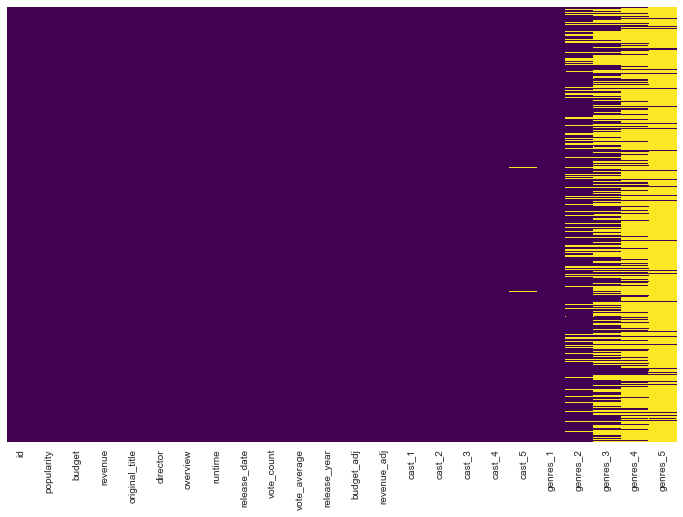

In [227]:
plt.figure(figsize=(12,8))
sns.heatmap(df_revenue.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [228]:
# Bin edges taken from the min-max values from describe operation previously
bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [229]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [230]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration,  
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year}

In [231]:
movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                  116.29
         avg_budget             80,800,679.51
         avg_vote                        6.43
         frequent_cast             Tom Cruise
         frequent_genres               Action
         release_year                    2011
low      avg_duration                  105.45
         avg_budget             27,229,489.81
         avg_vote                        6.01
         frequent_cast         Robert De Niro
         frequent_genres                Drama
         release_year                    2007
medium   avg_duration                  109.15
         avg_budget             40,011,839.84
         avg_vote                        6.17
         frequent_cast         Robert De Niro
         frequent_genres                Drama
         release_year                    2005
very low avg_duration                  102.49
         avg_budget             12,554,209.54
         avg_vote                        5.95
         frequent_cast          Kate Bosworth
         frequent_genres                Drama
         release_year                    2011

In [232]:
df_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.00,0.19,-0.03,-0.00,-0.04,0.11,-0.00,0.49,-0.12,-0.09
popularity,0.19,1.00,0.45,0.62,0.22,0.78,0.32,0.17,0.40,0.55
budget,-0.03,0.45,1.00,0.69,0.26,0.56,0.02,0.27,0.96,0.53
revenue,-0.00,0.62,0.69,1.00,0.25,0.75,0.23,0.14,0.66,0.90
runtime,-0.04,0.22,0.26,0.25,1.00,0.27,0.35,-0.11,0.33,0.28
vote_count,0.11,0.78,0.56,0.75,0.27,1.00,0.39,0.21,0.50,0.65
vote_average,-0.00,0.32,0.02,0.23,0.35,0.39,1.00,-0.13,0.04,0.27
release_year,0.49,0.17,0.27,0.14,-0.11,0.21,-0.13,1.00,0.08,-0.10
budget_adj,-0.12,0.40,0.96,0.66,0.33,0.50,0.04,0.08,1.00,0.57
revenue_adj,-0.09,0.55,0.53,0.90,0.28,0.65,0.27,-0.10,0.57,1.00


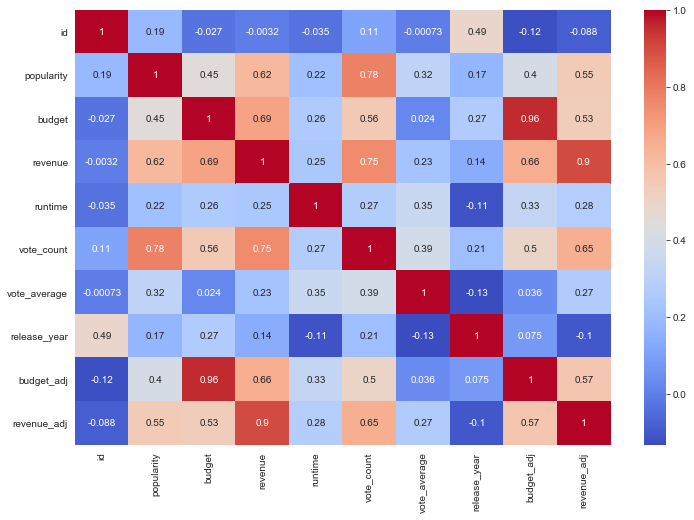

In [233]:
plt.figure(figsize=(12,8))
sns.heatmap(df_revenue.corr(),cmap='coolwarm', annot = True) 

## 4. Conclusion

#### To conclude the research on the topic 1: Which Genres are popular from year to year, the results obtained are not very specific or inclined to one result. It shows that the popular genre varies from year to year. It is not constant. But Drama and Comedy are one of the most popular ones among the given data.

#### To conclude the research on the topic 2: What kinds of properties are associated with movies that have high revenues, the conclusions drawn for this research is that the numeric columns of "popularity, budget and vote_count" show the highest correlations.

#### Every dataset or analysis has its own limitations. With the data provided, these were the conclusions that can be drawn. Main issue was with the missing data. Removing the missing data causes a lot of data loss but the missing data in this data were difficult to replace too. Hence, had to be removed. The data did not have any issues with being a tidy dataset but there were a lot of quality issues. Missing values and too many parameters in a single feature separated by delimiters. If the data had been of better quality then the analysis results could have been more specific and accurate.